In [1]:
import matplotlib.pyplot as plt
import numpy as np

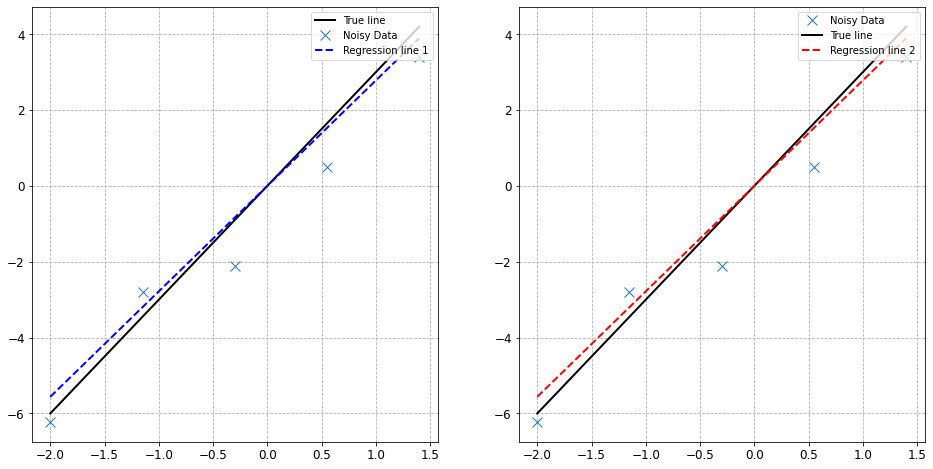

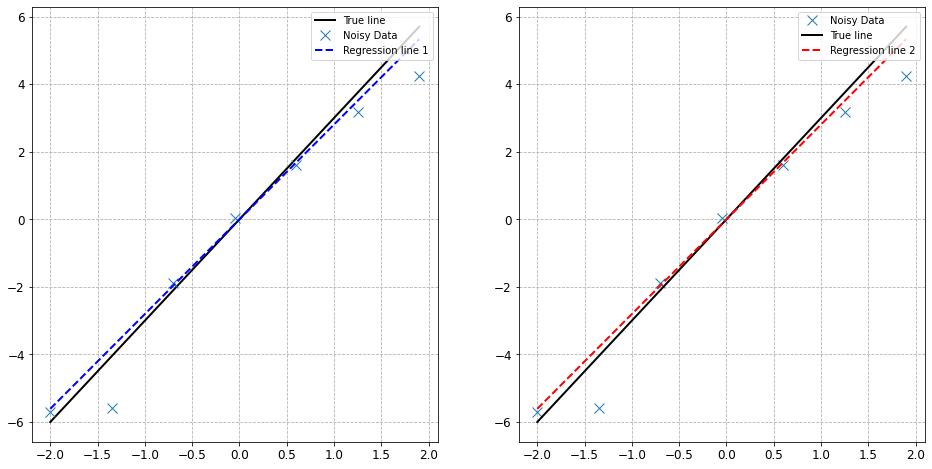

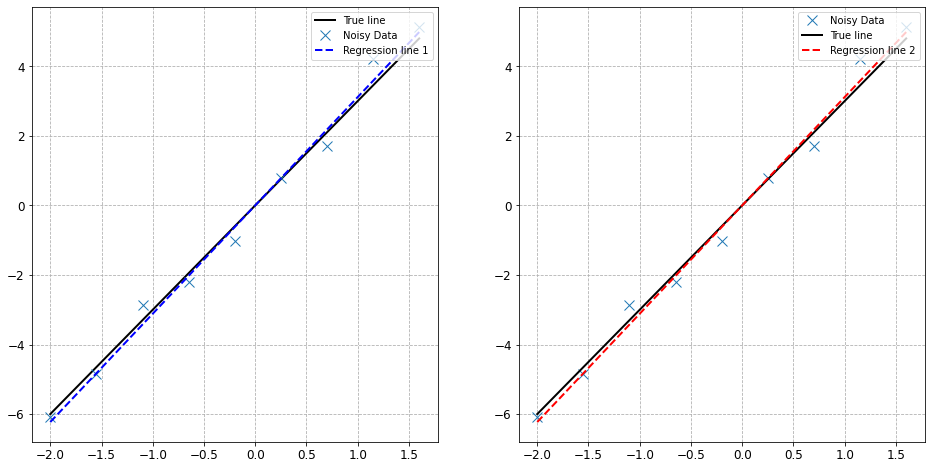

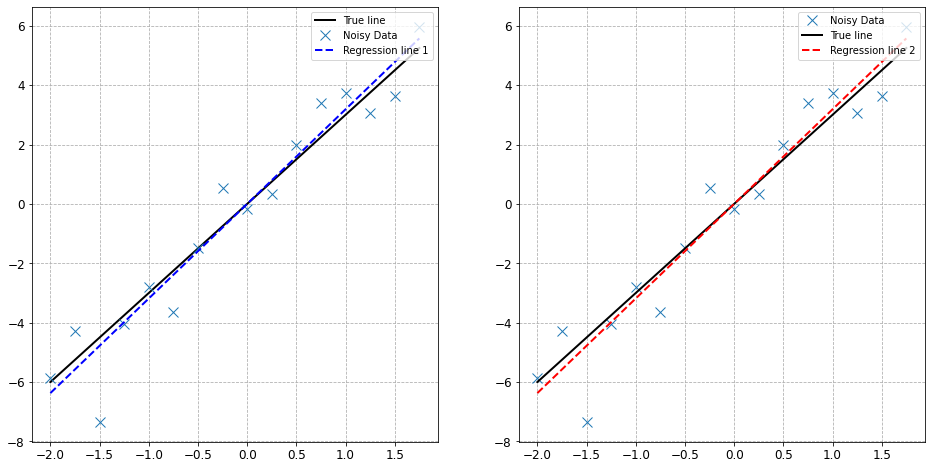

In [2]:
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size' : 12})

x = 3 # True slope
num_data = np.flip(np.arange(0.25, 1, 0.2))

for k in num_data:
    a = np.arange(-2,2,k)
    a = a.reshape(-1,1) # -1 means interpreter will substitute the only possible value
    b = x*a + np.random.randn(*a.shape) #adding noise

    U, S, VT = np.linalg.svd(a, full_matrices = False)    
    xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
    
    xtilde2 = np.linalg.pinv(a) @ b
    
    plt.subplot(1,2,1)
    plt.plot(a, x*a, color = 'k', linewidth = 2, label = 'True line')
    plt.plot(a, b, 'x', markersize = 10, label = 'Noisy Data')
    plt.plot(a, xtilde1*a, '--', color = 'b', linewidth = 2, label = 'Regression line 1')
    plt.grid(linestyle = '--')
    plt.legend(loc = 'upper right', bbox_to_anchor = (1, 1), fontsize = 10)
    
    plt.subplot(1,2,2)
    plt.plot(a, b, 'x', markersize = 10, label = 'Noisy Data')
    plt.plot(a, x*a, color = 'k', linewidth = 2, label = 'True line')
    plt.plot(a, xtilde2*a, '--', color = 'r', linewidth = 2, label = 'Regression line 2')
    plt.grid(linestyle = '--')
    plt.legend(loc = 'upper right', bbox_to_anchor = (1, 1), fontsize = 10)
    
    plt.show()

# As data points are increasing regression line is approaching towards the true slope
# We can calculate that by SVD and pseudo inverse